In [93]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.patches as mpatches
%matplotlib inline

In [94]:
print("kheili khari")
dff = df = pd.DataFrame.from_csv('fer2013.csv', index_col=None)

kheili khari


In [66]:
cv = df.drop([int(k) for k in range(28709)]) #PublicTest
cv = cv.drop([int(k) for k in range(32298, 35887)]) #PublicTest 28709,32297
test = df.drop([int(k) for k in range(32298)]) #PrivateTest
#test

In [67]:
df = df.drop([int(k) for k in range(28709,35887)]) #Test

In [68]:
y = df.emotion
#y = pd.DataFrame(y)
y_cv = cv.emotion
#y_cv = pd.DataFrame(y_cv)
y_test = test.emotion
#y_test = pd.DataFrame(y_test)
#y['emotion']

In [69]:
df = df.drop('emotion', axis = 1)
df = df.drop('Usage', axis = 1)
cv = cv.drop('emotion', axis = 1)
cv = cv.drop('Usage', axis = 1)
test = test.drop('emotion', axis = 1)
test = test.drop('Usage', axis = 1)


In [70]:
nparr = np.zeros((28709, 2304))
nparr1 = np.zeros((3589, 2304))
nparr2 = np.zeros((3589, 2304))

In [71]:
for i in range(28709):
    df.pixels[i] = [int(j) for j in df.pixels[i].split()]
    nparr[i] = np.array(df.pixels[i])

In [72]:
maindf = pd.DataFrame(nparr, columns=[int(i) for i in range(2304)])
X = maindf
#X

In [73]:
for i in range(28709,32298):#public
    cv.pixels[i] = [int(j) for j in cv.pixels[i].split()]
    nparr1[i-28709] = np.array(cv.pixels[i])

In [74]:
maincv = pd.DataFrame(nparr1, columns=[int(i) for i in range(2304)])
X_cv = maincv

In [75]:
for i in range(32298,35887):#private
    test.pixels[i] = [int(j) for j in test.pixels[i].split()]
    nparr2[i-32298] = np.array(test.pixels[i])

In [76]:
maintest = pd.DataFrame(nparr2, columns=[int(i) for i in range(2304)])
X_test = maintest

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [78]:
#X_train, X_t, y, y_cv = train_test_split(X, y, )

In [79]:
#model = SVC(kernel='rbf')

In [80]:
#model.fit(X, y)

In [81]:
#predictions = model.predict(X_test)

In [82]:
#from sklearn.metrics import classification_report, confusion_matrix, log_loss

In [83]:
#print(confusion_matrix(y_test, predictions))

In [84]:
#print(classification_report(y_test, predictions))

In [85]:
#for i in range(35):
 #   plt.subplot(5,7,i+1)
#    h = df.pixels
#    h = [int(j) for j in h[j].split()]
#    h = np.array(h).reshape([48,48])
#    plt.imshow(h)
#plt.show

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
randomforest = RandomForestClassifier(n_estimators=30)

In [88]:
randomforest.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [89]:
from sklearn.metrics import classification_report

In [90]:
print(classification_report(y_cv, randomforest.predict(X_cv)))

             precision    recall  f1-score   support

          0       0.34      0.24      0.28       467
          1       1.00      0.29      0.44        56
          2       0.35      0.28      0.31       496
          3       0.45      0.69      0.54       895
          4       0.36      0.31      0.33       653
          5       0.63      0.55      0.59       415
          6       0.36      0.31      0.34       607

avg / total       0.42      0.42      0.41      3589



<function matplotlib.pyplot.show>

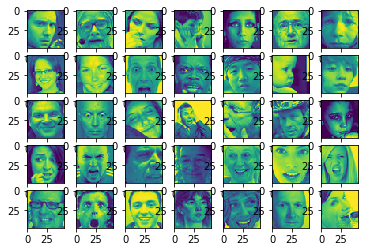

In [95]:
for i in range(35):
    plt.subplot(5,7,i+1)
    h = dff.pixels
    h = [int(j) for j in h[i].split()]
    h = np.array(h).reshape([48,48])
    plt.imshow(h)
plt.show

In [97]:
pca = PCA(n_components=500)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=500, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

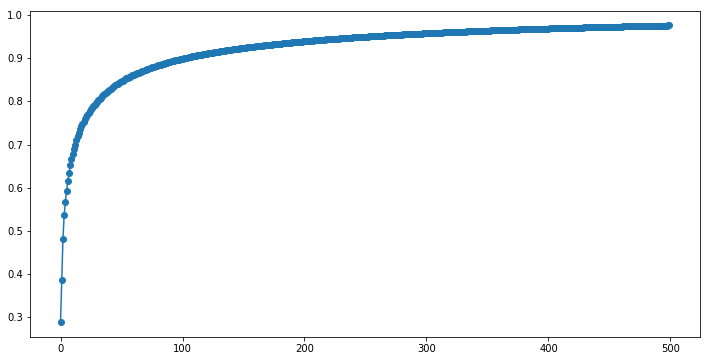

In [98]:
plt.figure(figsize=(12,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_[0:500]),marker = 'o')
plt.show()

In [99]:
np.cumsum(pca.explained_variance_ratio_[0:500])[200]

0.93897993575616812

In [100]:
pca = PCA(n_components= 200)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=200, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [101]:
x_train = pca.transform(X)
x_test = pca.transform(X_cv)

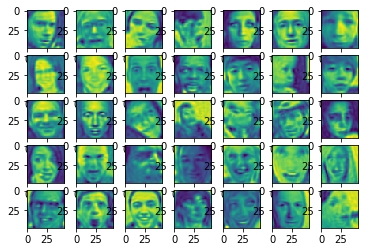

In [102]:
for i in range(35):
    plt.subplot(5,7,i+1)
    plt.imshow(pca.inverse_transform(x_train)[i].reshape((48, 48)), interpolation='nearest' )
plt.show()

In [103]:
randomforest.fit(x_train, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [104]:
print(classification_report(y_cv,randomforest.predict(x_test)))

             precision    recall  f1-score   support

          0       0.29      0.22      0.25       467
          1       1.00      0.29      0.44        56
          2       0.32      0.26      0.28       496
          3       0.37      0.68      0.48       895
          4       0.33      0.23      0.27       653
          5       0.72      0.47      0.57       415
          6       0.31      0.24      0.27       607

avg / total       0.39      0.37      0.36      3589



In [105]:
import pandas_profiling

/usr/local/lib/python3.5/dist-packages/pandas_profiling/plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python3.5/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/lib/python3/dist-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/usr/lib/python3/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/lib/python3/dist-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/usr/lib/python3/dist-packages/zmq/eventloop/ioloop.py", line

In [ ]:
pandas_profiling.ProfileReport(X)